function approximation with keras
---

In [98]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np


pi = np.pi

%matplotlib inline
plt.style.use('dark_background')

In [99]:
class feed_forward_continuous(keras.models.Sequential):
    def __init__(self, num_inputs, num_hidden, num_outputs, hidden_size = 128):
        super().__init__()
        #self.add(tf.keras.layers.Dense(num_inputs, activation = 'relu', kernel_initializer='he_normal',
        #                                bias_initializer=tf.random.normal))
        for layer in range(num_hidden):
            self.add(tf.keras.layers.Dense(hidden_size, activation = 'relu', kernel_initializer='he_normal',
                                        bias_initializer=tf.random.normal))
        self.add(tf.keras.layers.Dense(num_outputs))
#         self.compile(optimizer = 'adam', loss = 'mse')


In [100]:
test_model = feed_forward_continuous(1,2,1)
test_model.trainable_variables

[]

# Approximate Sine

In [104]:
#make rng
seed=2023
rng = np.random.default_rng(seed)
input_width = 2*pi
input_center = pi

epoch_losses = 0.
num_epochs = 200
batch_size = 32

epoch_print_period = 100

sin_model = feed_forward_continuous(1, 2, 1, 32)

#training loop
approx_this_function = tf.math.sin
loss_fn = tf.losses.mean_squared_error
optimizer = tf.optimizers.Adam(learning_rate=.01)
history = []
loss_history = []
for epoch in range(num_epochs):
#     optimizer.learning_rate = optimizer.learning_rate*0.999
    batch_Xes = []
    batch_preds = []
    batch_y = []
    losses = []
    with tf.GradientTape() as tape:
        for batch_guy in range(batch_size):
            x = input_width*(rng.random()-0.5) + input_center
            batch_Xes.append(x)
            pred = sin_model(tf.constant([[x]]))
            y = approx_this_function(x)
            batch_preds.append(pred)
            batch_y.append(y)
            losses.append(loss_fn(pred,y))
        loss = tf.reduce_mean(losses)
    grads = tape.gradient(loss, sin_model.trainable_variables)
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, sin_model.trainable_variables))
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    history.append([batch_Xes, batch_preds, batch_y])
    loss_history.append(loss)
    if epoch%epoch_print_period==0:
        print(f'Epoch {epoch}: loss {loss}')
    
print('done')

Epoch 0: loss 91.01802062988281
Epoch 100: loss 0.06914731860160828
done


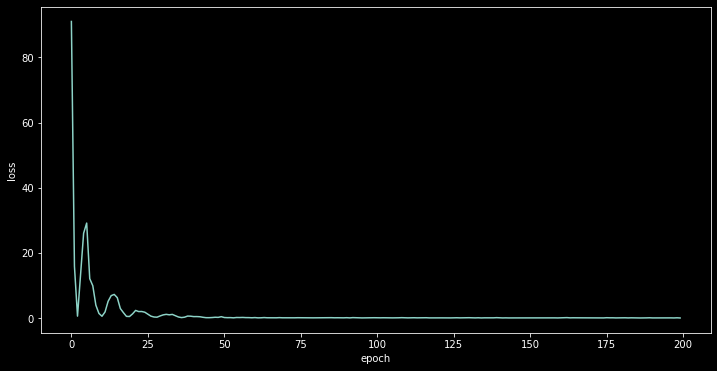

In [105]:
figsize = (12,6)
plt.figure(figsize = figsize)
plt.plot(loss_history)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

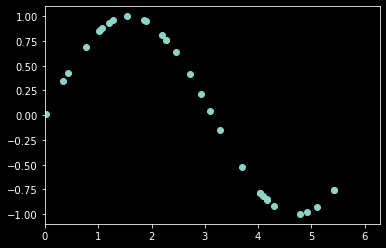

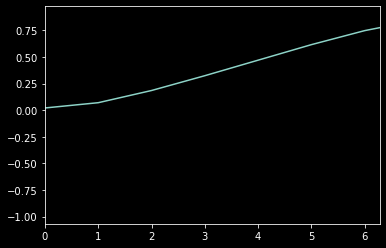

In [106]:
plt.scatter(batch_Xes, batch_y)
plt.xlim(0,2*pi)
plt.show()
y = sin_model.predict(np.linspace(0, 2*pi, 50))
plt.xlim(0,2*pi)
plt.plot(y)
plt.show()

In [107]:
grads

[<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
 array([[ 2.6634193e-03, -8.3537683e-02,  0.0000000e+00,  6.8048097e-02,
          4.2987594e-07, -1.4498063e-04,  1.7037201e-01, -2.2880131e-01,
         -1.5952306e-06, -6.8334565e-02,  1.8205360e-03, -1.5299165e-01,
          4.6601605e-02,  0.0000000e+00, -3.5534292e-02, -5.9054997e-02,
          0.0000000e+00, -1.0789205e-01,  0.0000000e+00,  3.3827126e-04,
          2.0343443e-02,  0.0000000e+00,  0.0000000e+00, -7.1421325e-02,
          0.0000000e+00, -9.5758196e-03,  2.6287239e-06,  3.7238207e-02,
          0.0000000e+00,  0.0000000e+00,  9.9980623e-02, -5.2854739e-02]],
       dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([ 6.0773361e-04, -1.1884538e-02,  0.0000000e+00,  9.6271094e-03,
         3.2600110e-05, -1.4807776e-04,  2.3539187e-02, -1.0096069e-01,
        -1.2097605e-04, -9.2831179e-03, -4.6228606e-04, -2.1055961e-02,
         6.3007195e-03,  0.0000000e+00, -5.3374302e-03, -7.9734586e-03,
    

In [86]:

optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0003676998>

In [125]:
#make rng
seed=2022
rng = np.random.default_rng(seed)
pi = np.pi
input_width = 4*pi
input_center = 2*pi

epoch_losses = 0.
num_epochs = 640
batch_size = 256

sin_model = feed_forward_continuous(1, 1, 1, 128)

#training loop
approx_this_function = tf.math.sin
loss_fn = tf.losses.mean_squared_error
optimizer = tf.optimizers.Adam(learning_rate=.05)
history = []
loss_history = []
for epoch in range(num_epochs):
    optimizer.learning_rate = optimizer.learning_rate*0.9
    if epoch%100==0:
        print(f'Epoch {epoch}')
    batch_Xes = []
    batch_preds = []
    batch_y = []
    losses = []
    with tf.GradientTape() as tape:
        x = input_width*(rng.random(batch_size)-0.5) + input_center
        pred = sin_model.predict(tf.convert_to_tensor([x]))
        y = [ approx_this_function(value) for value in x ]
        losses.append(loss_fn(pred,y))
        loss = tf.reduce_mean(losses)
        grads = tape.gradient(loss, sin_model.trainable_variables)
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, sin_model.trainable_variables))
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    history.append([batch_Xes, batch_preds, batch_y])
    loss_history.append(loss)

Epoch 0


LookupError: No gradient defined for operation'IteratorGetNext' (op type: IteratorGetNext). In general every operation must have an associated `@tf.RegisterGradient` for correct autodiff, which this op is lacking. If you want to pretend this operation is a constant in your program, you may insert `tf.stop_gradient`. This can be useful to silence the error in cases where you know gradients are not needed, e.g. the forward pass of tf.custom_gradient. Please see more details in https://www.tensorflow.org/api_docs/python/tf/custom_gradient.

# approx sine with full width of domain

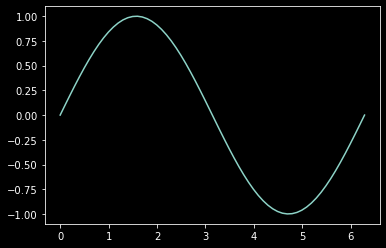

In [132]:
pi = np.pi

x = tf.convert_to_tensor(tf.cast(tf.linspace(0.,2.*pi,64), tf.float32))
y = tf.math.sin(x)

plt.plot(x,y)

In [137]:
num_epochs = 640

sin_model = feed_forward_continuous(1, 1, 1, 128)

approx_this_function = tf.math.sin

#training loop
loss_fn = tf.losses.mean_squared_error
optimizer = tf.optimizers.Adam(learning_rate=.01)
history = []
loss_history = []
for epoch in range(num_epochs):
    optimizer.learning_rate = optimizer.learning_rate*0.999
    if epoch%10==0:
        print(f'Epoch {epoch}')
    with tf.GradientTape() as tape:
        pred = sin_model(x)
        y = approx_this_function(x)
        loss = loss_fn(pred,y)
        loss = tf.reduce_mean(losses)
    grads = tape.gradient(loss, sin_model.trainable_variables)
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, sin_model.trainable_variables))
        #if epoch%50 == 0:
        #    print(sin_model.trainable_variables)
    history.append([batch_Xes, batch_preds, batch_y])
    loss_history.append(loss)

Epoch 0


ValueError: Exception encountered when calling layer "feed_forward_continuous_43" (type feed_forward_continuous).

Input 0 of layer "dense_121" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (64,)

Call arguments received:
  • inputs=tf.Tensor(shape=(64,), dtype=float32)
  • training=None
  • mask=None

# Following first tensorflow guide basics

In [156]:
x = tf.linspace(0., 2.*pi, 128)
x = tf.cast(x, tf.float32)

approx_this_function = tf.math.sin

y = approx_this_function(x) + 0.25*tf.random.normal(shape = [128])

In [161]:
class cute_model(tf.keras.Model):
    def __init__(self, units):
        super().__init__()
        self.dense1 = keras.layers.Dense(units = units,
                                        activation = 'relu',
                                        kernel_initializer = tf.random.normal,
                                        bias_initializer = tf.random.normal)
        self.dense2 = keras.layers.Dense(1)
        
    def call(self, x, training = True):
        x = x[:, tf.newaxis]
        x = self.dense1(x)
        x = self.dense2(x)
        return tf.squeeze(x, axis = 1)
       

In [189]:
sin_model = cute_model(128)

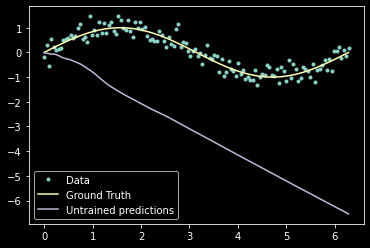

In [190]:
plt.plot(x, y, '.', label = 'Data')
plt.plot(x, approx_this_function(x), label = 'Ground Truth')
plt.plot(x, sin_model(x), label = 'Untrained predictions')
plt.legend();


In [191]:
num_epochs = 500
epoch_update_period = 50

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

for epoch in range(num_epochs):
    with tf.GradientTape() as tape:
        pred = sin_model(x)
        error = (y-pred)**2
        mean_error = tf.reduce_sum(error)
    grads = tape.gradient(mean_error, sin_model.trainable_variables)
    optimizer.apply_gradients(zip(grads, sin_model.trainable_variables))
    
    if epoch % epoch_update_period == 0:
        print(f'Epoch {epoch}: loss {mean_error}')

Epoch 0: loss 1647.738525390625
Epoch 50: loss 25.751995086669922
Epoch 100: loss 16.960857391357422
Epoch 150: loss 13.86339282989502
Epoch 200: loss 11.542207717895508
Epoch 250: loss 10.193989753723145
Epoch 300: loss 9.562261581420898
Epoch 350: loss 9.308283805847168
Epoch 400: loss 9.20654296875
Epoch 450: loss 9.165645599365234


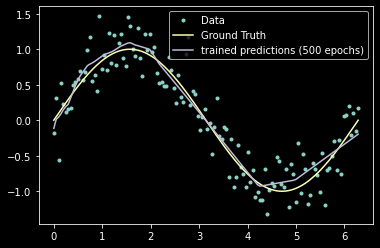

In [192]:
plt.plot(x, y, '.', label = 'Data')
plt.plot(x, approx_this_function(x), label = 'Ground Truth')
plt.plot(x, sin_model(x), label = f'trained predictions ({num_epochs} epochs)')
plt.legend();


In [199]:
sin_model(tf.convert_to_tensor([4,6]))

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.7330827 , -0.33682606], dtype=float32)>

In [207]:
new_x = rng.random(50)*2*pi
new_y = tf.math.sin(new_x)
new_preds = sin_model(new_x)

In [211]:
new_x

array([5.04624714, 1.47513575, 5.41141367, 5.79150523, 2.06201483,
       6.27524549, 3.11139643, 3.9047031 , 1.11291278, 0.38246777,
       5.65782024, 2.41117041, 5.13477376, 3.97393384, 3.53000609,
       5.7735831 , 4.56320612, 1.96742008, 1.8596459 , 4.35786647,
       2.70663798, 2.82028158, 1.83381186, 4.48664106, 4.79585637,
       3.05744336, 3.00866777, 0.15616973, 5.49998491, 1.69374705,
       5.72448123, 1.76749327, 1.65296867, 6.16750064, 3.6083525 ,
       1.61098679, 4.99103421, 5.34668222, 5.27216889, 1.21748462,
       2.748954  , 1.65370964, 2.88890795, 3.58357855, 2.5583031 ,
       1.18761132, 2.08453851, 1.78333713, 2.26480892, 4.56938961])

In [210]:
new_y

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([-0.94478509,  0.99542802, -0.76547014, -0.47210761,  0.88175874,
       -0.00793973,  0.03019164, -0.69117267,  0.89699009,  0.37321107,
       -0.58539329,  0.66718422, -0.91211393, -0.73950936, -0.37872051,
       -0.48783004, -0.98889286,  0.92237052,  0.95857221, -0.93781235,
        0.4213693 ,  0.3158108 ,  0.96561035, -0.97462697, -0.99651862,
        0.08405002,  0.13253379,  0.1555357 , -0.70555102,  0.99245108,
       -0.53008777,  0.98071745,  0.99662575, -0.1154268 , -0.44999509,
        0.99919247, -0.96142896, -0.80549073, -0.847372  ,  0.93823199,
        0.3826276 ,  0.99656466,  0.25000431, -0.42773536,  0.55077256,
        0.92747854,  0.87091155,  0.9774981 ,  0.76868565, -0.989793  ])>

In [209]:
new_preds

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.80964464,  1.0707688 , -0.6286153 , -0.44018576,  0.91531986,
       -0.20037456,  0.01901869, -0.6524244 ,  0.9427346 ,  0.3733065 ,
       -0.5064599 ,  0.60074794, -0.7657582 , -0.71102065, -0.33528683,
       -0.4490721 , -0.89233   ,  1.0007993 ,  1.0240026 , -0.9171546 ,
        0.3587424 ,  0.26541463,  1.0294573 , -0.9015855 , -0.86420435,
        0.06468395,  0.10596661,  0.09818394, -0.5847067 ,  1.0568655 ,
       -0.4734132 ,  1.0434607 ,  1.0682983 , -0.25378987, -0.4015977 ,
        1.0816095 , -0.8370165 , -0.66070527, -0.69764537,  0.97096217,
        0.32408288,  1.0680634 ,  0.20733015, -0.3806294 ,  0.48023787,
        0.96132165,  0.89143896,  1.0401156 ,  0.7206269 , -0.89158195],
      dtype=float32)>

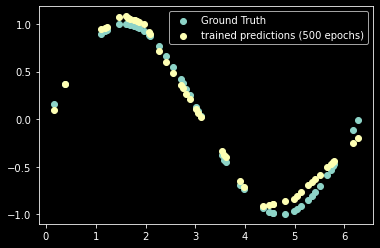

In [213]:
plt.scatter(new_x, new_y, label = 'Ground Truth')
plt.scatter(new_x, new_preds, label = f'trained predictions ({num_epochs} epochs)')
plt.legend();